In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg as LA
import japanize_matplotlib
import matplotlib.pyplot as plt

# PCA

## PCA from scrach

In [71]:
#サンプルデータ準備
x = np.array([3, 4, 2, 3, 4, 4, 3])
y = np.array([2, 3, 5, 5, 3, 2, 3])
X = pd.DataFrame({'x':x, 'y':y})

In [68]:
def my_pca(X, num_componets):
    # step1. 標準化
    X_meaned = X - np.mean(X, axis=0)
    X_scaled = X_meaned / np.std(X, axis=0)
    
    # step2. 共分散行列
    cov_matrix = np.cov(X_scaled, rowvar=False)
    
    # step3. 固有ベクトルと固有値
    eig_val, eig_vec =  LA.eigh(cov_matrix)
    sorted_index = np.argsort(eig_val)[::-1]
    sorted_evalues = eig_val[sorted_index]
    sorted_vectors = eig_vec[:, sorted_index]
    subset_evectors = sorted_vectors[:, :num_componets]
    
    # step4. 変換
    X_reduced = np.dot(X_scaled, subset_evectors)
    
    return X_reduced

In [69]:
my_pca(X, 2)

array([[-0.49467432,  1.07202459],
       [-0.89576549, -0.54761018],
       [ 2.34350404,  0.25457217],
       [ 1.33314107, -0.7557908 ],
       [-0.89576549, -0.54761018],
       [-1.50503729,  0.06166162],
       [ 0.11459748,  0.46275279]])

## sklearnのPCA

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=1)
X = scaler.fit_transform(X)
pca.fit_transform(X)

array([[-0.49467432],
       [-0.89576549],
       [ 2.34350404],
       [ 1.33314107],
       [-0.89576549],
       [-1.50503729],
       [ 0.11459748]])

# IRISデータの次元圧縮後の可視化

In [95]:
# データ準備
df = sns.load_dataset('iris')
y_col = 'species'
X = df.loc[:, df.columns!=y_col]
y = df[y_col].values


# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
X_pc = PCA(n_components=2).fit_transform(X_scaled)


In [97]:
# concatinateのために2次元化
y = y.reshape(-1, 1)

<Axes: xlabel='first component', ylabel='second component'>

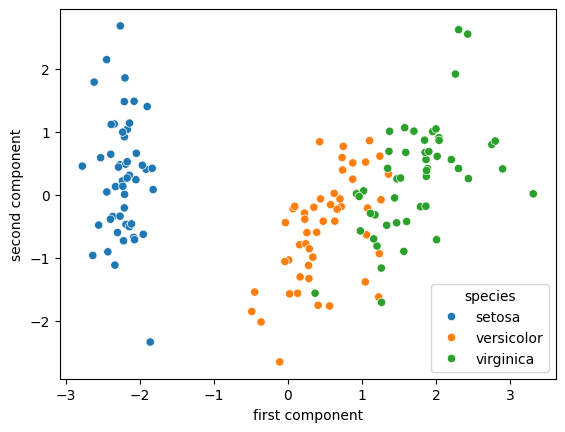

In [107]:
df_pc = pd.DataFrame(np.concatenate([X_pc, y], axis=1), columns=['first component', 'second component', 'species'])
sns.scatterplot(x='first component', y='second component', data=df_pc , hue='species')

In [215]:
# データ準備
df = sns.load_dataset('iris')
y_col = 'species'
X = df.loc[:, df.columns!=y_col]
y = df[y_col].values


# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pc = pca.fit_transform(X_scaled)


Text(0, 0.5, '累積寄与率')

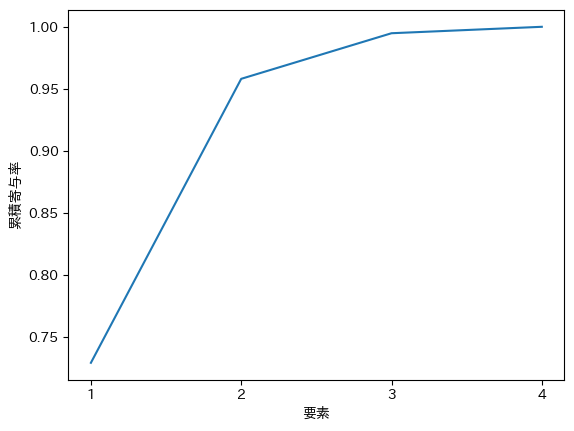

In [216]:
explain_value = pca.explained_variance_ratio_

# 累積寄与率
# ratio_list = []
# tmp = 0
# for value in explain_value:
#     tmp += value
#     ratio_list.append(tmp)

ratio_list = np.cumsum(explain_value)


# グラフの描画
x_line = range(1, len(explain_value)+1)

plt.plot(x_line, ratio_list)
plt.xticks(range(1, len(explain_ratio)+1))
plt.xlabel('要素')
plt.ylabel('累積寄与率')

## PCA on MINIST

In [29]:
from sklearn.datasets import fetch_openml
from matplotlib.pyplot import imshow

In [33]:
mnist = fetch_openml('mnist_784')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [34]:
df = mnist.data


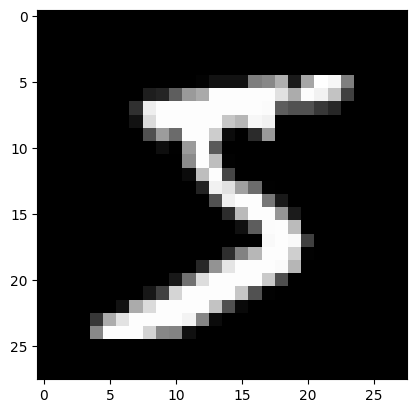

In [35]:
img = df.iloc[0].values.reshape(28, 28)
imshow(img, 'gray')
    

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [6]:
# # データ
# X = mnist.data
# y = mnist.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

# PCAで累積寄与率95%を探す


In [15]:
# cumsum_values = np.cumsum(pca.explained_variance_ratio_)

# tmp_dict = {}
# for idx, value in enumerate(cumsum_values):
#     if value > 0.95:
#         tmp_dict[idx] = value
# first_95vakue = next(iter(tmp_dict))

In [24]:
# 標準化
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)




In [28]:
# PCA
# pca = PCA(n_components=0.95)
# pca.fit(X_train)

In [26]:
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

# 見本

In [40]:
# hold-out
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=0) 
# 標準化
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# PCA
pca = PCA(n_components=0.95).fit(X_train)
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

In [48]:
print(f"{X_train.shape[-1]} dimentions is reduced to {X_train_pc.shape[-1]} by PCA")

784 dimentions is reduced to 323 by PCA


In [49]:
# ロジスティック回帰(PCAあり)
import time

model_pca =  LogisticRegression()
before = time.time()
model_pca.fit(X_train_pc, y_train)
after = time.time()
print(f"fit took {after-before:.2f}s")

fit took 6.22s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
y_pred_pc =model_pca.predict(X_test_pc)

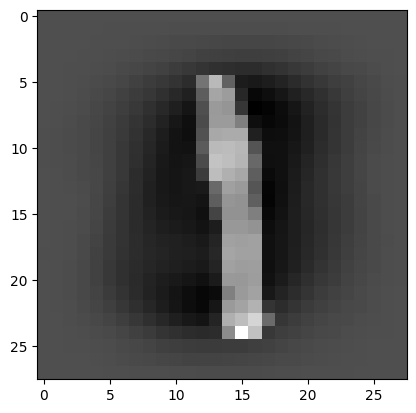

In [57]:
index = 2
img = X_test[index].reshape(28, 28)
imshow(img, 'gray')

In [61]:
# 評価

accuracy_score(y_test, y_pred_pc)

0.9195238095238095

In [62]:
# ロジスティック回帰(PCAなし)
import time

model =  LogisticRegression()
before = time.time()
model.fit(X_train, y_train)
after = time.time()
print(f"fit took {after-before:.2f}s")

fit took 12.02s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
y_pred =model.predict(X_test)
accuracy_score(y_test, y_pred)

0.910047619047619